## Age prediction using CNN built from scratch

## Installing the packages

In [1]:
!pip install opencv-python

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

### Getting the data to a dataframe

In [3]:
df = pd.read_csv('/Users/manideepakreddyaila/Downloads/archive-2/train.csv')
df.head()
cond_list = [df['Class'] == 'MIDDLE', df['Class'] == 'YOUNG', df['Class'] == 'OLD']
choice_list = [1, 0, 2]

df["index"] = np.select(cond_list, choice_list)

### Count plot of the output variables

/Users/manideepakreddyaila/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

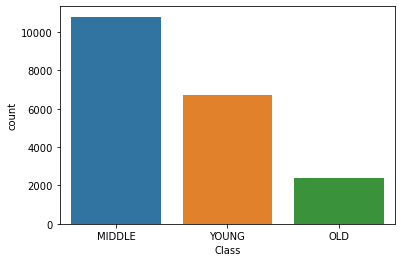

In [20]:
sns.countplot(df['Class'])

In [4]:
df.dtypes

ID       object
Class    object
index     int64
dtype: object

### preprocessing the data

In [5]:
path = "/Users/manideepakreddyaila/Downloads/archive-2/Train"
images = []
age = []

for img in os.listdir(path):
    img1 = cv2.imread(str(path) + "/" + str(img))
    img1 = cv2.resize(img1, (70,70), interpolation = cv2.INTER_AREA)
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    images.append(np.array(img1))
    df1 = df[df['ID'] == str(img)]['index']
    ages = []
    ages.append((np.array(df1.values[0])))
    age.append(ages)

age = to_categorical(age, 3)
age = np.array(age)
print(type(age[0]))
print(type(age))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print(age[0])

[1. 0. 0.]


In [7]:
images = np.array(images)

### Test Train split

In [8]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)

In [9]:
print((X_train_age).shape)
print(X_train_age[0].shape)
print(type(X_test_age))

(14929, 70, 70, 3)
(70, 70, 3)
<class 'numpy.ndarray'>


### Creating model

In [10]:
age_model = Sequential()
age_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(70,70,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(64, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(3, activation='softmax', name='age'))
              
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

2022-12-14 11:32:34.037713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 age (Dense)                 (None, 3)                 1539      
                                                                 
Total params: 540,867
Trainable params: 540,867
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
X_train_age = X_train_age/255
X_test_age = X_test_age/255

In [12]:
print(type(X_train_age))

<class 'numpy.ndarray'>


In [13]:
print(type(y_train_age))

<class 'numpy.ndarray'>


In [14]:
y_train_age[0]

array([1., 0., 0.], dtype=float32)

In [15]:
age_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Fitting the model

In [16]:
hist = age_model.fit(X_train_age, y_train_age, epochs=20, validation_data= (X_test_age, y_test_age) )

Epoch 1/20
467/467 [==============================] - 156s 332ms/step - loss: 0.8992 - accuracy: 0.5801 - val_loss: 0.8223 - val_accuracy: 0.6502
Epoch 2/20
467/467 [==============================] - 157s 337ms/step - loss: 0.7753 - accuracy: 0.6727 - val_loss: 0.7633 - val_accuracy: 0.6787
Epoch 3/20
467/467 [==============================] - 165s 354ms/step - loss: 0.7302 - accuracy: 0.6878 - val_loss: 0.7172 - val_accuracy: 0.6908
Epoch 4/20
467/467 [==============================] - 158s 339ms/step - loss: 0.6951 - accuracy: 0.7037 - val_loss: 0.6913 - val_accuracy: 0.7062
Epoch 5/20
467/467 [==============================] - 160s 343ms/step - loss: 0.6654 - accuracy: 0.7173 - val_loss: 0.6903 - val_accuracy: 0.6932
Epoch 6/20
467/467 [==============================] - 152s 325ms/step - loss: 0.6398 - accuracy: 0.7310 - val_loss: 0.6612 - val_accuracy: 0.7163
Epoch 7/20
467/467 [==============================] - 150s 322ms/step - loss: 0.6218 - accuracy: 0.7391 - val_loss: 0.6910 -

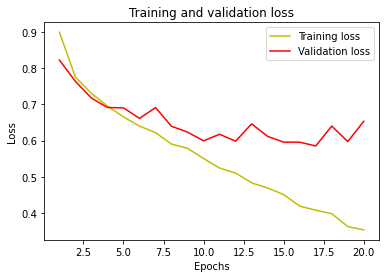

In [17]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

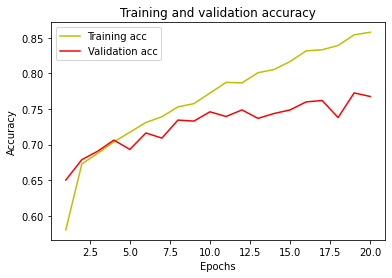

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()